In [14]:
import pandas as pd
df = pd. read_csv("caesarian.csv", sep=",", header=0)
df.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [15]:
X = df.iloc[:, 0:5]
Y = df.iloc[:, 5]
delivery_time_map = {
    0: 'timely',
    1: 'premature',
    2: 'latecomer'
}
X['delivery time 2'] = X['Delivery time'].map(delivery_time_map)
X = X.drop(['Delivery time'], axis=1)
X.head()

,Age,Delivery number,Blood of Pressure,Heart Problem,delivery time 2
0,22,1,2,0,timely
1,26,2,1,0,timely
2,26,2,1,0,premature
3,28,1,2,0,timely
4,22,2,1,0,timely


In [16]:
X = pd.get_dummies(X)
X.head()

,Age,Delivery number,Blood of Pressure,Heart Problem,delivery time 2_latecomer,delivery time 2_premature,delivery time 2_timely
0,22,1,2,0,0,0,1
1,26,2,1,0,0,0,1
2,26,2,1,0,0,1,0
3,28,1,2,0,0,0,1
4,22,2,1,0,0,0,1


In [17]:
X = X.drop(['delivery time 2_timely'], axis=1)
X.head()

,Age,Delivery number,Blood of Pressure,Heart Problem,delivery time 2_latecomer,delivery time 2_premature
0,22,1,2,0,0,0
1,26,2,1,0,0,0
2,26,2,1,0,0,1
3,28,1,2,0,0,0
4,22,2,1,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [31]:
from sklearn.svm import SVC
model = SVC(gamma='auto')

In [32]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.75

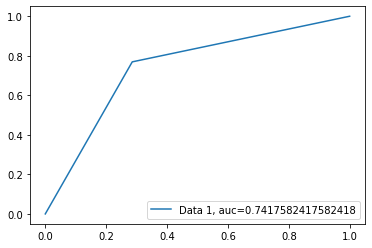

In [33]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_prob = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

model = SVC(gamma='auto')
scores = cross_val_score(model, X, Y, cv=10)
scores.mean()

0.6341269841269841